## Data setup

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1XumACAnIFQXrzclnAUFwyG3gNDIvkKQy'})
download.GetContentFile('x_train.txt')
download = drive.CreateFile({'id': '1E2tsWAs_-5YsIlm9fhP9rGmK-Gi6N4Fz'})
download.GetContentFile('y_train.txt')
download = drive.CreateFile({'id': '19nSzcGef_NSrlDpP5nilU9tzBs29-3LM'})
download.GetContentFile('x_test.txt')
download = drive.CreateFile({'id': '1I1WLTsgzoDLMYVC3rHbpo-s3v-25CWUk'})
download.GetContentFile('y_test.txt')

# 561 Features
# 6 Labels:
## 1 WALKING
## 2 WALKING_UPSTAIRS
## 3 WALKING_DOWNSTAIRS
## 4 SITTING
## 5 STANDING
## 6 LAYING

In [0]:
import pandas as pd
x_train = pd.read_csv('x_train.txt', header=None, delim_whitespace=True)
y_train = pd.read_csv('y_train.txt', header=None)
x_test = pd.read_csv('x_test.txt', header=None, delim_whitespace=True)
y_test = pd.read_csv('y_test.txt', header=None)

## Using PCA

Number of eigenvalues: 67


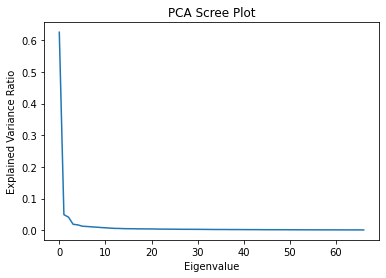

In [0]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(0.95)
pca.fit(x_train)
explained_var = pca.explained_variance_ratio_
print('Number of eigenvalues:', len(explained_var))

plt.plot(list(range(len(explained_var))), explained_var);
plt.title('PCA Scree Plot');
plt.xlabel('Eigenvalue'); plt.ylabel('Explained Variance Ratio')

pc_train = pca.transform(x_train)
ypc_train = np.ravel(y_train).copy()
pc_test = pca.transform(x_test)

In [0]:
start = time.time()
clf = XGBClassifier(booster='gbtree')
scores = cross_val_score(clf, pc_train, ypc_train, cv=10)
print(" Mean (%):", round(np.mean(scores)*100,2))
print(" Variance:", round(np.var(scores),5))
print(" Time (s):", round(time.time() - start,2))

 Mean (%): 94.7
 Variance: 4e-05
 Time (s): 169.38


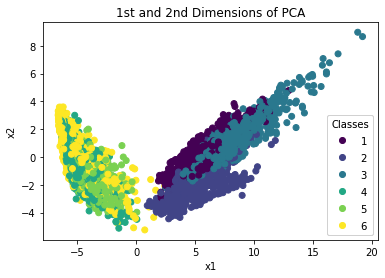

In [0]:
fig, ax = plt.subplots();
scatter = ax.scatter(pc_train[:,0], pc_train[:,1], c=ypc_train);
plt.title('1st and 2nd Dimensions of PCA')
plt.xlabel('x1'); plt.ylabel('x2');
ax.add_artist(ax.legend(*scatter.legend_elements(),title="Classes"));

## Using LDA

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(x_train, np.ravel(y_train))
ld_train = clf.transform(x_train)
yld_train = np.ravel(y_train).copy()
ld_test = clf.transform(x_test)
yld_test = np.ravel(y_test).copy()
print(ld_train.shape)

(7352, 5)


In [0]:
start = time.time()
clf = XGBClassifier(booster='gbtree')
scores = cross_val_score(clf, ld_train, yld_train, cv=10)
print(" Mean (%):", round(np.mean(scores)*100,2))
print(" Variance:", round(np.var(scores),5))
print(" Time (s):", round(time.time() - start,2))

 Mean (%): 98.52
 Variance: 1e-05
 Time (s): 15.08


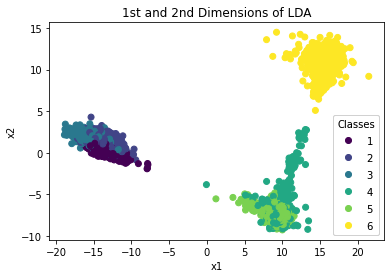

In [0]:
fig, ax = plt.subplots();
scatter = ax.scatter(ld_train[:,0], ld_train[:,1], c=yld_train);
plt.title('1st and 2nd Dimensions of LDA')
plt.xlabel('x1'); plt.ylabel('x2');
ax.add_artist(ax.legend(*scatter.legend_elements(),title="Classes"));

## Selecting Hyperparameters

In [0]:
import time
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Testing both
C_list = ['gblinear','gbtree']

for C in C_list:
    start = time.time()
    print(C)
    clf = XGBClassifier(booster=C)
    acc = []
    for j in range(10):
        indices = np.arange(ld_train.shape[0])
        np.random.shuffle(indices)
        ld_train = ld_train[indices]
        yld_train = yld_train[indices]
        scores = cross_val_score(clf, ld_train, yld_train, cv=10)
        acc.append(scores)
    print(" Mean (%):", round(np.mean(acc)*100,2))
    print(" Variance:", round(np.var(acc),5))
    print(" Time (s):", round(time.time() - start,2))

gblinear
 Mean: 0.9854321391600118
 Variance: 1.36758762035824e-05
 Time: 53.314162254333496
gbtree
 Mean: 0.9848616163856845
 Variance: 1.744146675450338e-05
 Time: 148.9348602294922


0
 Mean (%): 98.5323
 Variance: 2e-05
 Time (s): 124.0
1
 Mean (%): 98.531
 Variance: 2e-05
 Time (s): 120.9
10
 Mean (%): 98.5364
 Variance: 2e-05
 Time (s): 129.56
20
 Mean (%): 98.5296
 Variance: 2e-05
 Time (s): 124.59
30
 Mean (%): 98.5283
 Variance: 2e-05
 Time (s): 125.82
40
 Mean (%): 98.5175
 Variance: 2e-05
 Time (s): 125.32
50
 Mean (%): 98.5351
 Variance: 2e-05
 Time (s): 125.61
60
 Mean (%): 98.527
 Variance: 2e-05
 Time (s): 125.92
70
 Mean (%): 98.4916
 Variance: 2e-05
 Time (s): 126.42
80
 Mean (%): 98.4984
 Variance: 2e-05
 Time (s): 126.46
90
 Mean (%): 98.4807
 Variance: 2e-05
 Time (s): 126.36
100
 Mean (%): 98.4862
 Variance: 2e-05
 Time (s): 126.69


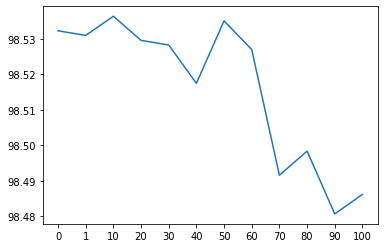

In [0]:
import time
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Tree
p_list = [0,1,10,20,30,40,50,60,70,80]
acc_list = []
for p in p_list:
    start = time.time()
    print(p)
    clf = XGBClassifier(booster='gbtree', reg_lambda=p, max_depth=2)
    acc = []
    for j in range(10):
        indices = np.arange(ld_train.shape[0])
        np.random.shuffle(indices)
        ld_train = ld_train[indices]
        yld_train = yld_train[indices]
        scores = cross_val_score(clf, ld_train, yld_train, cv=10)
        acc.append(scores)
    acc_list.append(round(np.mean(acc)*100,4))
    print(" Mean (%):", round(np.mean(acc)*100,4))
    print(" Variance:", round(np.var(acc),5))
    print(" Time (s):", round(time.time() - start,2))
p_list = list(map(str,p_list))
plt.plot(p_list,acc_list);

0
 Mean (%): 98.6466
 Variance: 2e-05
 Time (s): 54.43
1
 Mean (%): 98.5419
 Variance: 2e-05
 Time (s): 54.49
10
 Mean (%): 97.1763
 Variance: 2e-05
 Time (s): 54.68
50
 Mean (%): 71.1848
 Variance: 8e-05
 Time (s): 54.42
100
 Mean (%): 54.5022
 Variance: 0.0
 Time (s): 54.4


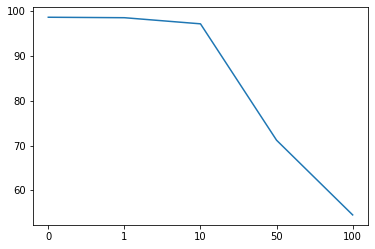

In [0]:
import time
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Linear
p_list = [0,1,10,50,100]
acc_list = []
for p in p_list:
    start = time.time()
    print(p)
    clf = XGBClassifier(booster='gblinear', reg_lambda=p)
    acc = []
    for j in range(10):
        indices = np.arange(ld_train.shape[0])
        np.random.shuffle(indices)
        ld_train = ld_train[indices]
        yld_train = yld_train[indices]
        scores = cross_val_score(clf, ld_train, yld_train, cv=10)
        acc.append(scores)
    acc_list.append(round(np.mean(acc)*100,4))
    print(" Mean (%):", round(np.mean(acc)*100,4))
    print(" Variance:", round(np.var(acc),5))
    print(" Time (s):", round(time.time() - start,2))
p_list = list(map(str,p_list))
plt.plot(p_list,acc_list);

## Test Dataset (Confusion Matrix)

In [0]:
import time
import numpy as np
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

XGBoost Tree LDA:	Test Accuracy: 95.32 Time: 2.283


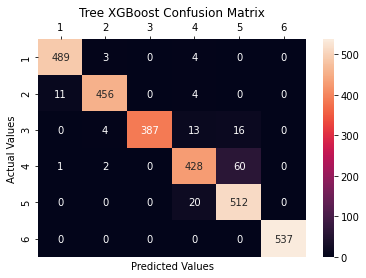

XGBoost Linear LDA:	Test Accuracy: 96.27 Time: 0.617


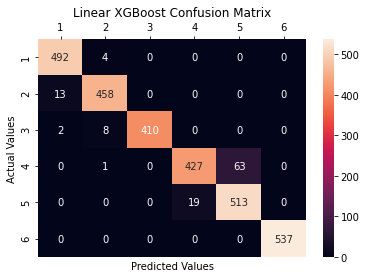

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

start = time.time()
clf = XGBClassifier(booster='gbtree', reg_lambda=10, max_depth=6)
clf.fit(ld_train, yld_train)
print("XGBoost Tree LDA:\tTest Accuracy:", round(clf.score(ld_test, np.ravel(y_test))*100, 2), "Time:", round(time.time() - start, 3))
y_pred = clf.predict(ld_test)
cm = confusion_matrix(np.ravel(y_test), y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Values'); ax.set_xticklabels(['1', '2', '3', '4', '5', '6']); ax.xaxis.tick_top();
plt.ylabel('Actual Values'); ax.set_yticklabels(['1', '2', '3', '4', '5', '6']);
plt.title('Tree XGBoost Confusion Matrix'); plt.show();

start = time.time()
clf = XGBClassifier(booster='gblinear', reg_lambda=1)
clf.fit(ld_train, yld_train)
print("XGBoost Linear LDA:\tTest Accuracy:", round(clf.score(ld_test, np.ravel(y_test))*100, 2), "Time:", round(time.time() - start, 3))
y_pred = clf.predict(ld_test)
cm = confusion_matrix(np.ravel(y_test), y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Values'); ax.set_xticklabels(['1', '2', '3', '4', '5', '6']); ax.xaxis.tick_top();
plt.ylabel('Actual Values'); ax.set_yticklabels(['1', '2', '3', '4', '5', '6']);
plt.title('Linear XGBoost Confusion Matrix'); plt.show();